In [5]:
import json
from pathlib import Path

import numpy as np
import pandas as pd

FILES_DIR = "../../housing/flatfox_listings"

In [6]:
BASE_DIR = Path(FILES_DIR)
listings_list = []
for i in range(260):
    with open(BASE_DIR.absolute() / f"flatfox_listings_100_{i}.json") as f:
        data = json.loads(f.read())
        for listing in data["results"]:
            listings_list.append(listing)

In [7]:
df = pd.DataFrame.from_dict(listings_list)

In [8]:
df.head()

,pk,slug,url,short_url,submit_url,status,created,offer_type,object_category,object_type,...,tour_url,website_url,live_viewing_url,cover_image,images,documents,agency,reserved,rent_title,livingspace
0,26706,parkstr-12-9430-st-margrethen-sg,/en/flat/parkstr-12-9430-st-margrethen-sg/26706/,/26706/,/en/listing/26706/submit/,act,2017-12-08T17:05:54.496849+01:00,RENT,INDUSTRY,OFFICE,...,None,None,None,6168251.0,"[6168251, 6168252, 6168253, 6168254, 6168255, ...",[],"{'name': 'Schaeppi Grundstücke AG', 'name_2': ...",False,Rent a 127m² office in St. Margrethen SG,127.0
1,33819,martha-ringier-strasse-5600-lenzburg,/en/flat/martha-ringier-strasse-5600-lenzburg/...,/33819/,/en/listing/33819/submit/,act,2018-03-26T16:57:27.300926+02:00,RENT,PARK,GARAGE_SLOT,...,None,None,None,319437.0,"[319437, 319438]",[],"{'name': 'Die Immobilien-Treuhänder', 'name_2'...",False,Rent a underground slot in Lenzburg,NaN
2,44676,sonnentalstrasse-10-8600-dubendorf,/en/flat/sonnentalstrasse-10-8600-dubendorf/44...,/44676/,/en/listing/44676/submit/,act,2018-08-03T09:03:30.396567+02:00,RENT,INDUSTRY,ATELIER,...,,,,463033.0,"[463033, 463034, 6880004]",[5996],"{'name': '', 'name_2': '', 'street': '', 'zipc...",False,Rent a 119m² atelier in Dübendorf,119.0
3,46167,waldstrasse-5-9008-st-gallen,/en/flat/waldstrasse-5-9008-st-gallen/46167/,/46167/,/en/listing/46167/submit/,act,2018-08-20T18:39:53.772772+02:00,RENT,APARTMENT,SINGLE_ROOM,...,,,None,483988.0,"[483988, 483989, 483990, 483991, 483992, 483993]",[],"{'name': 'Home-Vermittlung Höhener', 'name_2':...",False,Rent a 1 room single room in St. Gallen,17.0
4,51159,8005-zurich,/en/flat/8005-zurich/51159/,/51159/,/en/listing/51159/submit/,act,2018-10-07T12:13:24.307367+02:00,RENT,SHARED,SHARED_FLAT,...,,,None,557032.0,"[557032, 557031, 557033, 557035, 557036]",[],"{'name': '', 'name_2': None, 'street': None, '...",False,Rent a room in a shared flat in Zürich,18.0


In [9]:
df.columns

Index(['pk', 'slug', 'url', 'short_url', 'submit_url', 'status', 'created',
       'offer_type', 'object_category', 'object_type', 'reference',
       'ref_property', 'ref_house', 'ref_object', 'alternative_reference',
       'price_display', 'price_display_type', 'price_unit', 'published',
       'rent_net', 'rent_charges', 'rent_gross', 'short_title', 'public_title',
       'pitch_title', 'description_title', 'description', 'surface_living',
       'surface_property', 'surface_usable', 'surface_usable_minimum',
       'volume', 'space_display', 'number_of_rooms', 'floor', 'attributes',
       'is_furnished', 'is_temporary', 'is_selling_furniture', 'street',
       'zipcode', 'city', 'public_address', 'latitude', 'longitude',
       'year_built', 'year_renovated', 'moving_date_type', 'moving_date',
       'video_url', 'tour_url', 'website_url', 'live_viewing_url',
       'cover_image', 'images', 'documents', 'agency', 'reserved',
       'rent_title', 'livingspace'],
      dtype='objec

In [10]:
df.dtypes.head()

pk             int64
slug          object
url           object
short_url     object
submit_url    object
dtype: object

In [11]:
df[df["pk"] == 26706]

,pk,slug,url,short_url,submit_url,status,created,offer_type,object_category,object_type,...,tour_url,website_url,live_viewing_url,cover_image,images,documents,agency,reserved,rent_title,livingspace
0,26706,parkstr-12-9430-st-margrethen-sg,/en/flat/parkstr-12-9430-st-margrethen-sg/26706/,/26706/,/en/listing/26706/submit/,act,2017-12-08T17:05:54.496849+01:00,RENT,INDUSTRY,OFFICE,...,None,None,None,6168251.0,"[6168251, 6168252, 6168253, 6168254, 6168255, ...",[],"{'name': 'Schaeppi Grundstücke AG', 'name_2': ...",False,Rent a 127m² office in St. Margrethen SG,127.0


In [12]:
df[df["rent_net"] > 1000].head()

,pk,slug,url,short_url,submit_url,status,created,offer_type,object_category,object_type,...,tour_url,website_url,live_viewing_url,cover_image,images,documents,agency,reserved,rent_title,livingspace
2,44676,sonnentalstrasse-10-8600-dubendorf,/en/flat/sonnentalstrasse-10-8600-dubendorf/44...,/44676/,/en/listing/44676/submit/,act,2018-08-03T09:03:30.396567+02:00,RENT,INDUSTRY,ATELIER,...,,,,463033.0,"[463033, 463034, 6880004]",[5996],"{'name': '', 'name_2': '', 'street': '', 'zipc...",False,Rent a 119m² atelier in Dübendorf,119.0
5,51970,chemin-jean-pavillard-1009-pully,/en/flat/chemin-jean-pavillard-1009-pully/51970/,/51970/,/en/listing/51970/submit/,act,2018-10-14T13:29:17.457600+02:00,RENT,APARTMENT,APARTMENT,...,,,None,567711.0,"[567711, 567706, 567708, 567707, 567709, 56771...",[],"{'name': '', 'name_2': None, 'street': None, '...",False,Rent a 5 rooms apartment in Pully,175.0
7,56908,beaumont-76-1010-lausanne,/en/flat/beaumont-76-1010-lausanne/56908/,/56908/,/en/listing/56908/submit/,act,2018-11-14T21:46:56.200043+01:00,RENT,APARTMENT,APARTMENT,...,,,None,621565.0,"[621565, 621566, 621567, 621568, 621571, 62157...",[],"{'name': '', 'name_2': None, 'street': None, '...",False,Rent a 5 ½ rooms apartment in Lausanne,150.0
8,56960,loft-valangines-2000-neuchatel,/en/flat/loft-valangines-2000-neuchatel/56960/,/56960/,/en/listing/56960/submit/,act,2018-11-15T11:27:34.483607+01:00,RENT,APARTMENT,APARTMENT,...,,,None,622263.0,"[622263, 622270, 622264, 622265, 622266, 62226...",[],"{'name': 'Saco Sa', 'name_2': None, 'street': ...",False,Rent a 2 ½ rooms apartment in Neuchâtel,145.0
9,58372,grand-rue-46-1297-founex,/en/flat/grand-rue-46-1297-founex/58372/,/58372/,/en/listing/58372/submit/,act,2018-11-27T13:51:46.877254+01:00,RENT,APARTMENT,APARTMENT,...,,,None,640551.0,"[640551, 640552, 640553, 640554, 640555, 64055...",[],"{'name': None, 'name_2': None, 'street': None,...",False,Rent a 4 rooms apartment in Founex,110.0


In [6]:
%%timeit
# Select all rows with "offer_type" == "RENT" and "rent_net" > 3000
df[(df["offer_type"] == "RENT") & (df["rent_net"] > 3000)].head()

2.9 ms ± 57.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
%%timeit
# Select all rows with "offer_type" == "RENT" and "rent_net" > 3000
df[(df["offer_type"].values == "RENT") & (df["rent_net"].values > 3000)].head()

1.64 ms ± 53.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


# Possible Interview Questions

https://www.mlstack.cafe/blog/pandas-python-interview-questions

### 1. Create new columns from existing columns

In [13]:
df["rent_net_cents"] = df["rent_net"] * 100

### 2. Transform boolean column to 1 / 0 columns

In [14]:
df["reserved_one_zero"] = df["reserved"].astype(int) 

### 3. How do you get the names of columns in a DataFrame?

In [26]:
list(df.columns)
# sorted(df)

['pk',
 'slug',
 'url',
 'short_url',
 'submit_url',
 'status',
 'created',
 'offer_type',
 'object_category',
 'object_type',
 'reference',
 'ref_property',
 'ref_house',
 'ref_object',
 'alternative_reference',
 'price_display',
 'price_display_type',
 'price_unit',
 'published',
 'rent_net',
 'rent_charges',
 'rent_gross',
 'short_title',
 'public_title',
 'pitch_title',
 'description_title',
 'description',
 'surface_living',
 'surface_property',
 'surface_usable',
 'surface_usable_minimum',
 'volume',
 'space_display',
 'number_of_rooms',
 'floor',
 'attributes',
 'is_furnished',
 'is_temporary',
 'is_selling_furniture',
 'street',
 'zipcode',
 'city',
 'public_address',
 'latitude',
 'longitude',
 'year_built',
 'year_renovated',
 'moving_date_type',
 'moving_date',
 'video_url',
 'tour_url',
 'website_url',
 'live_viewing_url',
 'cover_image',
 'images',
 'documents',
 'agency',
 'reserved',
 'rent_title',
 'livingspace',
 'rent_net_cents',
 'reserved_one_zero']

### 4. How are `iloc` and `loc` different?

In [36]:
# `iloc` is an integer based position locator
# `loc` get rows and columns based on a particular label

In [30]:
df.iloc[0]

pk                                                              26706
slug                                 parkstr-12-9430-st-margrethen-sg
url                  /en/flat/parkstr-12-9430-st-margrethen-sg/26706/
short_url                                                     /26706/
submit_url                                  /en/listing/26706/submit/
                                           ...                       
reserved                                                        False
rent_title                   Rent a 127m² office in St. Margrethen SG
livingspace                                                     127.0
rent_net_cents                                                    NaN
reserved_one_zero                                                   0
Name: 0, Length: 62, dtype: object

In [41]:
df.iloc[-5:] # get last 5 rows

,pk,slug,url,short_url,submit_url,status,created,offer_type,object_category,object_type,...,live_viewing_url,cover_image,images,documents,agency,reserved,rent_title,livingspace,rent_net_cents,reserved_one_zero
25949,1032168,1522-lucens,/en/flat/1522-lucens/1032168/,/1032168/,/en/listing/1032168/submit/,act,2023-11-19T00:15:01.212329+01:00,RENT,APARTMENT,APARTMENT,...,None,7911682.0,"[7911682, 7911683, 7911684, 7911685, 7911686, ...",[],"{'name': 'LCR Immo', 'name_2': 'lcr-immo.ch', ...",False,Rent a 4 ½ rooms apartment in Lucens,100.0,170000.0,0
25950,1032169,1700-fribourg,/en/flat/1700-fribourg/1032169/,/1032169/,/en/listing/1032169/submit/,act,2023-11-19T00:15:03.338004+01:00,RENT,APARTMENT,APARTMENT,...,None,7911693.0,"[7911693, 7911694, 7911695, 7911696, 7911697, ...",[],"{'name': 'LCR Immo', 'name_2': 'lcr-immo.ch', ...",False,Rent a 4 ½ rooms apartment in Fribourg,108.0,220000.0,0
25951,1032170,2034-peseux,/en/flat/2034-peseux/1032170/,/1032170/,/en/listing/1032170/submit/,act,2023-11-19T00:15:05.487716+01:00,RENT,APARTMENT,APARTMENT,...,None,7911705.0,"[7911705, 7911706, 7911707, 7911708, 7911709, ...",[],"{'name': 'LCR Immo', 'name_2': 'lcr-immo.ch', ...",False,Rent a 4 ½ rooms apartment in Peseux,96.0,185000.0,0
25952,1032171,1263-crassier,/en/flat/1263-crassier/1032171/,/1032171/,/en/listing/1032171/submit/,act,2023-11-19T00:15:09.585666+01:00,RENT,HOUSE,SINGLE_HOUSE,...,None,7911717.0,"[7911717, 7911718, 7911719, 7911720, 7911721, ...",[],"{'name': 'LCR Immo', 'name_2': 'lcr-immo.ch', ...",False,Rent a 5 rooms single house in Crassier,180.0,430000.0,0
25953,1032196,auf-anfrage-8226-schleitheim,/en/flat/auf-anfrage-8226-schleitheim/1032196/,/1032196/,/en/listing/1032196/submit/,act,2023-11-19T01:17:36.938514+01:00,SALE,PROPERTY,BUILDING_LAND,...,None,7911943.0,"[7911943, 7911944, 7911945, 7911946, 7911947]",[],"{'name': 'Immo Station AG', 'name_2': None, 's...",False,Buy a 2242m² building land in Schleitheim,2242.0,NaN,0


In [33]:
df.iloc[:,2] # get all rows and second column

0         /en/flat/parkstr-12-9430-st-margrethen-sg/26706/
1        /en/flat/martha-ringier-strasse-5600-lenzburg/...
2        /en/flat/sonnentalstrasse-10-8600-dubendorf/44...
3             /en/flat/waldstrasse-5-9008-st-gallen/46167/
4                              /en/flat/8005-zurich/51159/
                               ...                        
25949                        /en/flat/1522-lucens/1032168/
25950                      /en/flat/1700-fribourg/1032169/
25951                        /en/flat/2034-peseux/1032170/
25952                      /en/flat/1263-crassier/1032171/
25953       /en/flat/auf-anfrage-8226-schleitheim/1032196/
Name: url, Length: 25954, dtype: object

In [35]:
df.iloc[:3,:3] # get the upper left 3x3 entries

,pk,slug,url
0,26706,parkstr-12-9430-st-margrethen-sg,/en/flat/parkstr-12-9430-st-margrethen-sg/26706/
1,33819,martha-ringier-strasse-5600-lenzburg,/en/flat/martha-ringier-strasse-5600-lenzburg/...
2,44676,sonnentalstrasse-10-8600-dubendorf,/en/flat/sonnentalstrasse-10-8600-dubendorf/44...


In [40]:
df.loc[0] # here 0 is one of the values in the index

pk                                                              26706
slug                                 parkstr-12-9430-st-margrethen-sg
url                  /en/flat/parkstr-12-9430-st-margrethen-sg/26706/
short_url                                                     /26706/
submit_url                                  /en/listing/26706/submit/
                                           ...                       
reserved                                                        False
rent_title                   Rent a 127m² office in St. Margrethen SG
livingspace                                                     127.0
rent_net_cents                                                    NaN
reserved_one_zero                                                   0
Name: 0, Length: 62, dtype: object

In [42]:
df.loc[:,"url"]

0         /en/flat/parkstr-12-9430-st-margrethen-sg/26706/
1        /en/flat/martha-ringier-strasse-5600-lenzburg/...
2        /en/flat/sonnentalstrasse-10-8600-dubendorf/44...
3             /en/flat/waldstrasse-5-9008-st-gallen/46167/
4                              /en/flat/8005-zurich/51159/
                               ...                        
25949                        /en/flat/1522-lucens/1032168/
25950                      /en/flat/1700-fribourg/1032169/
25951                        /en/flat/2034-peseux/1032170/
25952                      /en/flat/1263-crassier/1032171/
25953       /en/flat/auf-anfrage-8226-schleitheim/1032196/
Name: url, Length: 25954, dtype: object

In [44]:
df.loc[:,"rent_title":] # get all rows but only columns `rent_title` and after

,rent_title,livingspace,rent_net_cents,reserved_one_zero
0,Rent a 127m² office in St. Margrethen SG,127.0,NaN,0
1,Rent a underground slot in Lenzburg,NaN,13000.0,0
2,Rent a 119m² atelier in Dübendorf,119.0,198000.0,0
3,Rent a 1 room single room in St. Gallen,17.0,NaN,0
4,Rent a room in a shared flat in Zürich,18.0,NaN,0
...,...,...,...,...
25949,Rent a 4 ½ rooms apartment in Lucens,100.0,170000.0,0
25950,Rent a 4 ½ rooms apartment in Fribourg,108.0,220000.0,0
25951,Rent a 4 ½ rooms apartment in Peseux,96.0,185000.0,0
25952,Rent a 5 rooms single house in Crassier,180.0,430000.0,0


### 5. How can you sort a DataFrame?

In [59]:
df.sort_values(by=["year_built", "rent_net"], ascending=[True, False])[["year_built", "rent_net"]]

,year_built,rent_net
23716,0.0,9500.0
18488,0.0,5400.0
18739,0.0,4090.0
15849,0.0,3840.0
8620,0.0,3600.0
...,...,...
25939,NaN,NaN
25940,NaN,NaN
25941,NaN,NaN
25944,NaN,NaN


### 6. Find row for which the value of a column is `max` or `min`

In [67]:
df["rent_net"].idxmax()
df["rent_net"].idxmin()
# df.iloc[1946]
# df.iloc[27]

27

### 7. Find all columns of a specific data type

In [76]:
list(df.select_dtypes(include=["bool"]).columns)

['is_furnished', 'is_temporary', 'is_selling_furniture', 'reserved']

### 8. How does the `groupby` method work in Pandas?

- Split (can be performed on rows or columns)
- Apply a function to individual groups to combine
- Combine results into a data structure

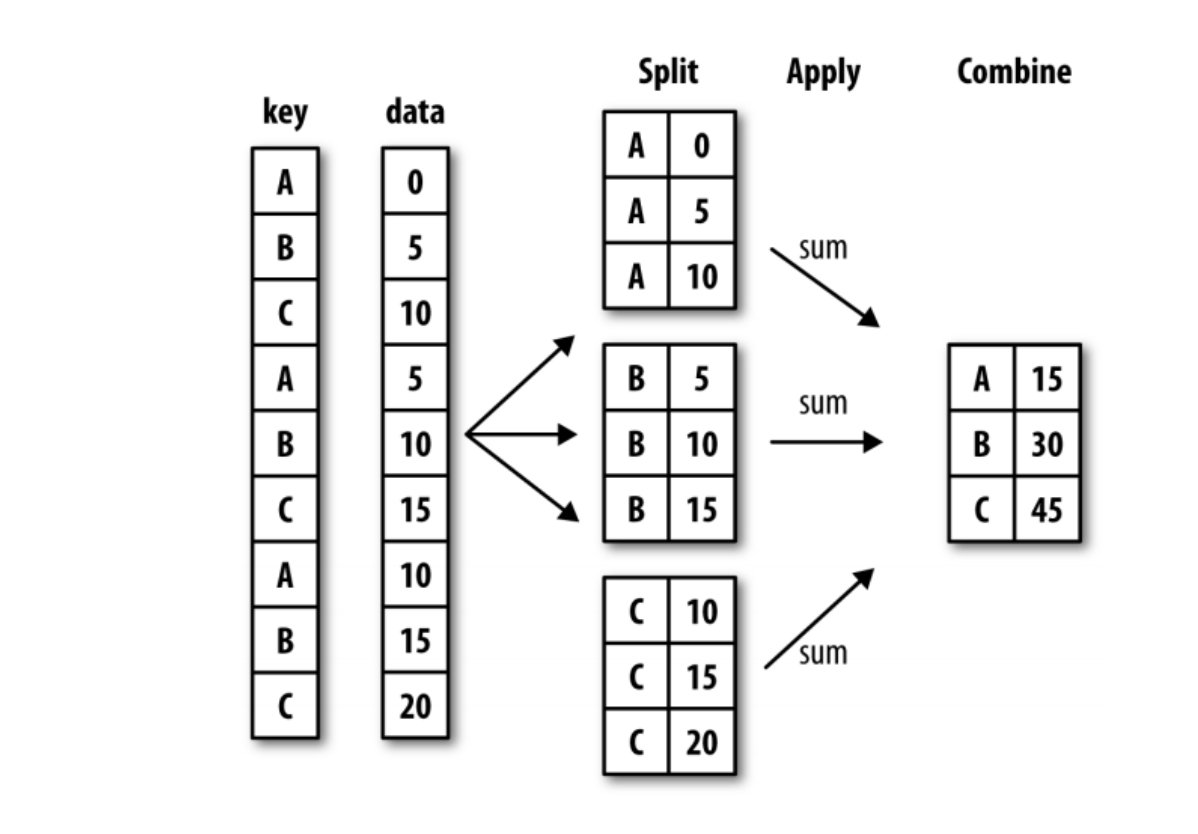

### String manipulation on rows and columns

In [95]:
df["rent_title"].str.len()

0        40
1        35
2        33
3        39
4        38
         ..
25949    36
25950    38
25951    36
25952    39
25953    41
Name: rent_title, Length: 25954, dtype: int64

In [92]:
df["rent_title"].str.split()

0        [Rent, a, 127m², office, in, St., Margrethen, SG]
1               [Rent, a, underground, slot, in, Lenzburg]
2                 [Rent, a, 119m², atelier, in, Dübendorf]
3        [Rent, a, 1, room, single, room, in, St., Gallen]
4         [Rent, a, room, in, a, shared, flat, in, Zürich]
                               ...                        
25949        [Rent, a, 4, ½, rooms, apartment, in, Lucens]
25950      [Rent, a, 4, ½, rooms, apartment, in, Fribourg]
25951        [Rent, a, 4, ½, rooms, apartment, in, Peseux]
25952     [Rent, a, 5, rooms, single, house, in, Crassier]
25953    [Buy, a, 2242m², building, land, in, Schleitheim]
Name: rent_title, Length: 25954, dtype: object

df["rent_title"].str.split(expand=True)

### 10. How to check whether a pandas DataFrame is empty?

In [96]:
df.empty

False

### 11. How would you iterate over rows of a pandas DataFrame?

In [101]:
for index, row in df.head().iterrows():
    print(index, row["rent_net"], row["livingspace"])

0 nan 127.0
1 130.0 nan
2 1980.0 119.0
3 nan 17.0
4 nan 18.0


### 12. Steps of groupby
- Split
- Apply
- Combine

### 13. What do `describe` percentile values tell us about the data?

In [106]:
# Percentiles, 50 is the median.
df["rent_net"].describe()

count    13618.000000
mean      1461.775224
std       1713.423528
min          0.000000
25%        250.000000
50%       1270.000000
75%       1869.500000
max      53882.000000
Name: rent_net, dtype: float64

### 14. When would you make a copy of a DataFrame in Pandas?

- Safer to work on copies

### 15. Compare the methods `map`, `applymap` and `apply`

#### `map`

- `map` only operates on `Series`. It converts values from input to output. If input is not found, converts to `NaN`.
- Accepts `dicts`, `Series` or `callable`

In [111]:
s = pd.Series(["cat", "dog", np.nan, "rabbit"])
s.map({"cat": "kitty", "dog": "puppy"})

0    kitty
1    puppy
2      NaN
3      NaN
dtype: object

#### `applymap`

- `deprecated`. Use `df.map` instead.
- `applymap` only operates on `DataFrame`. It applies a function that takes in a scalar and returns a scalar.

In [118]:
df = pd.DataFrame([[1.0, 2.0], [3.0, 4.0]])
df.map(lambda x: x*2)

,0,1
0,2.0,4.0
1,6.0,8.0


### `apply`

- Works elementwise. Applies function along input axis of DataFrame

In [122]:
df = pd.DataFrame([[4, 9]] * 3, columns=["A", "B"])
df.apply(np.sqrt)

,A,B
0,2.0,3.0
1,2.0,3.0
2,2.0,3.0


### 16. Describe how you can `merge` data on common columns or indices

- Available merges are: `inner`, `left`, `right` and `outer`
- `inner` (default): keep only common values in both left and right DataFrames
- `left`: keeps every row in the left DataFrame
- `right`: keeps every row in the right DataFrame
- `outer`: keeps all the rows, matches them where there are common values and adds `NaN`s otherwise.

In [123]:
df1 = pd.DataFrame({"a": ["foo", "bar"], "b": [1, 2]})
df2 = pd.DataFrame({"a": ["foo", "baz"], "c": [3, 4]})

In [128]:
df1

,a,b
0,foo,1
1,bar,2


In [129]:
df2

,a,c
0,foo,3
1,baz,4


In [126]:
df1.merge(df2, how="inner", on="a")

,a,b,c
0,foo,1,3


In [127]:
df1.merge(df2, how="left", on="a")

,a,b,c
0,foo,1,3.0
1,bar,2,NaN


In [130]:
df1.merge(df2, how="right", on="a")

,a,b,c
0,foo,1.0,3
1,baz,NaN,4


In [131]:
df1.merge(df2, how="outer", on="a")

,a,b,c
0,foo,1.0,3.0
1,bar,2.0,NaN
2,baz,NaN,4.0


### 17.

### 18. Group DataFrame rows into a list

In [134]:
df = pd.DataFrame({"a": ["A", "A", "B", "B", "B", "C"], "b": [1, 2, 5, 5, 4, 6]})
df

,a,b
0,A,1
1,A,2
2,B,5
3,B,5
4,B,4
5,C,6


Goal:
- Row A: [1, 2]
- Row B: [5, 5, 4]
- Row C: [6]

In [140]:
df1 = df.groupby("a")["b"].apply(list)
df1

a
A       [1, 2]
B    [5, 5, 4]
C          [6]
Name: b, dtype: object

In [142]:
df1.reset_index(name="list")

,a,list
0,A,"[1, 2]"
1,B,"[5, 5, 4]"
2,C,[6]


### 19. How can I achieve the equivalent of SQLs `IN` and `NOT IN` in Pandas?

In [143]:
df = pd.DataFrame({"A": [1, 2, 3, 4, 5, 6]})

#### `IN`

In [148]:
df[df["A"].isin([3, 6])]

,A
2,3
5,6


`NOT IN`

In [149]:
df[~df["A"].isin([3, 6])]

,A
0,1
1,2
3,4
4,5


### 20. How do you split a `DataFrame` according to a boolean criterion?

In [162]:
df = pd.DataFrame({
    "A": "foo bar foo bar foo bar foo foo".split(), 
    "B": "one one two three two two one three".split(), \
    "C": np.arange(8), 
    "D": np.arange(8) * 2
})

In [163]:
df

,A,B,C,D
0,foo,one,0,0
1,bar,one,1,2
2,foo,two,2,4
3,bar,three,3,6
4,foo,two,4,8
5,bar,two,5,10
6,foo,one,6,12
7,foo,three,7,14


 Use a mask

In [164]:
m = df["A"] == "foo"
df1, df2 = df[m], df[~m]

In [165]:
df1

,A,B,C,D
0,foo,one,0,0
2,foo,two,2,4
4,foo,two,4,8
6,foo,one,6,12
7,foo,three,7,14


In [166]:
df2

,A,B,C,D
1,bar,one,1,2
3,bar,three,3,6
5,bar,two,5,10


### 21. 

### 22.

### 23. How would you convert continuous values into discrete values in Pandas?

In [173]:
s = pd.Series([1, 2, 3, 4, 5, 6, 4, 5, 1, 4, 5, 6])

#### `cut`

In [174]:
pd.cut(s, bins=[0, 2, 6])

0     (0, 2]
1     (0, 2]
2     (2, 6]
3     (2, 6]
4     (2, 6]
5     (2, 6]
6     (2, 6]
7     (2, 6]
8     (0, 2]
9     (2, 6]
10    (2, 6]
11    (2, 6]
dtype: category
Categories (2, interval[int64, right]): [(0, 2] < (2, 6]]

#### `qcut`

In [177]:
pd.qcut(s, q=2)

0     (0.999, 4.0]
1     (0.999, 4.0]
2     (0.999, 4.0]
3     (0.999, 4.0]
4       (4.0, 6.0]
5       (4.0, 6.0]
6     (0.999, 4.0]
7       (4.0, 6.0]
8     (0.999, 4.0]
9     (0.999, 4.0]
10      (4.0, 6.0]
11      (4.0, 6.0]
dtype: category
Categories (2, interval[float64, right]): [(0.999, 4.0] < (4.0, 6.0]]

### 24. 

### 25. Is is a good idea to iterate over DataFrame rows in Pandas?

- Iteration in Pandas is an anti-pattern
- Avoid using functions with `iter` in the name if possible

### 26. Name some type conversion methods in Pandas

- `to_numeric`: convert from non-numeric types, such as string, to numeric ones.
- `as_type`: go from almost any type to almost any other type

### 27. What is the advantage of using the `map` vs the `apply` method?

In [192]:
df = pd.DataFrame({"A": ["hello there"], "B": ["hi friend"]})

#### `map`

- Good for elementwise transformations across multiple rows/columns

In [196]:
df.map(str.split)

,A,B
0,"[hello, there]","[hi, friend]"


#### `apply`

- Useful for applying any function that cannot be vectorised

In [200]:
# df["A"].apply(nltk.sent_tokenize)